## Plot the stability region of multiple methods by brute force calculation

A point $z$ is in the stable region if all roots corresponding to the characteristic polynomial has absolute value less than 1.

In [19]:
using Polynomials # need to install this ]add Polynomials"
using PyPlot
using LinearAlgebra

# Old version does not have ndgrid
function ndgrid(v1::AbstractVector{T}, v2::AbstractVector{T}) where T
    m, n = length(v1), length(v2)
    v1 = reshape(v1, m, 1)
    v2 = reshape(v2, 1, n)
    (repeat(v1, 1, n), repeat(v2, m, 1))
end

function RAS(alpha,beta)
    N=201
    x1d=range(-5.0,stop=5.0,length=N)
    X,Y=ndgrid(x1d,x1d)
    Z=zeros(size(X))
    @assert(length(alpha)==length(beta))
    for j = 1 : prod(size(X))
        lam = X[j] + im*Y[j]
        # println(alpha-lam*beta)
        w = roots(Poly(alpha-lam*beta))
        if(isempty(w))
            Z[j] = 0
        else 
            if(maximum(abs.(w))<=1.0)
                Z[j] = 1
            else
                Z[j] = 0
            end
        end
    end
    return X,Y,Z
end 



RAS (generic function with 1 method)

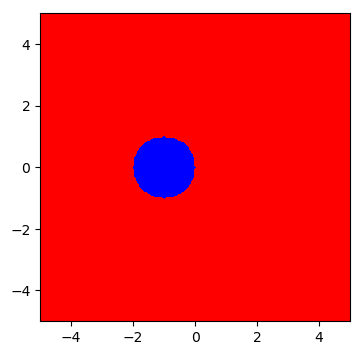

PyObject <matplotlib.contour.QuadContourSet object at 0x000000003BB09FD0>

In [20]:
# Forward Euler
X,Y,Z=RAS([-1.0,1.0],[1.0,0.0])
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

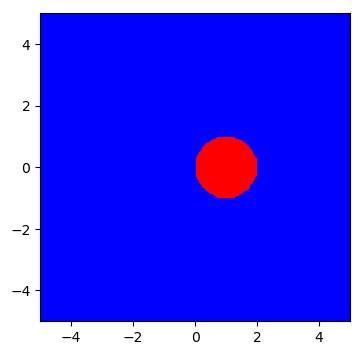

PyObject <matplotlib.contour.QuadContourSet object at 0x0000000000FB4390>

In [21]:
# Backward Euler
X,Y,Z=RAS([-1.0,1.0],[0.0,1.0])
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

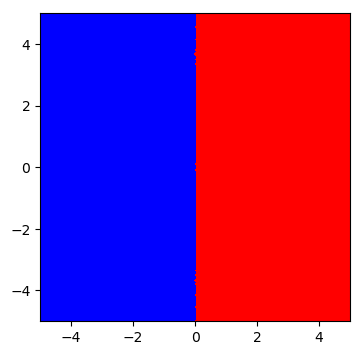

PyObject <matplotlib.contour.QuadContourSet object at 0x0000000001006710>

In [22]:
# Trapezoidal Euler
X,Y,Z=RAS([-1.0,1.0],[0.5,0.5])
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

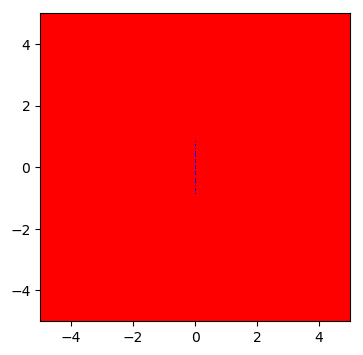

PyObject <matplotlib.contour.QuadContourSet object at 0x000000000105DA90>

In [23]:
# Midpoint
X,Y,Z=RAS([-0.5,0.0,+0.5],[0.0,1.0,0.0])
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

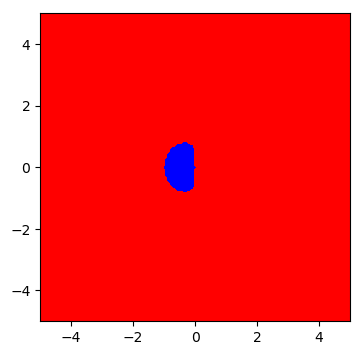

PyObject <matplotlib.contour.QuadContourSet object at 0x00000000010B9080>

In [24]:
# AB2

X,Y,Z=RAS([0,-1,1],[-1/2,3/2,0])
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

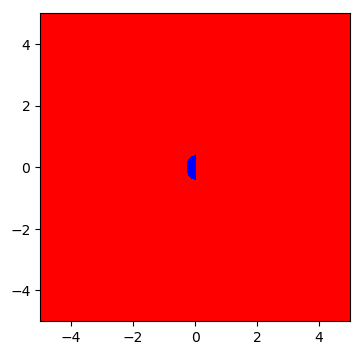

PyObject <matplotlib.contour.QuadContourSet object at 0x000000000110D3C8>

In [25]:
# AB4

X,Y,Z=RAS([0,0,0,-1,1],[-9/24,37/24,-59/24,55/24,0])
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

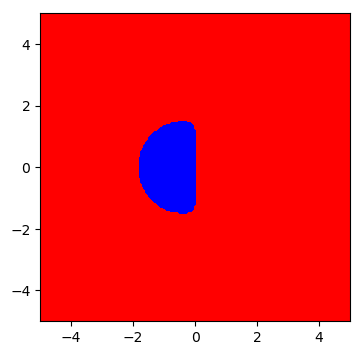

PyObject <matplotlib.contour.QuadContourSet object at 0x0000000001161780>

In [26]:
# AM4

X,Y,Z=RAS([0,0,0,-1,1],[-19,106,-264,646,251]/720)
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

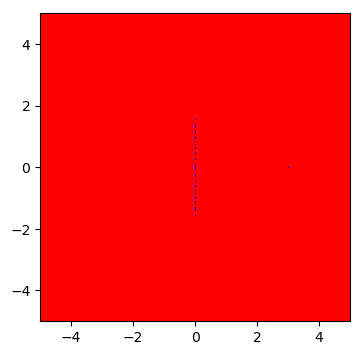

PyObject <matplotlib.contour.QuadContourSet object at 0x0000000002184B00>

In [27]:
# Milne

X,Y,Z=RAS([-1,0,1],[1/3,4/3,1/3])
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

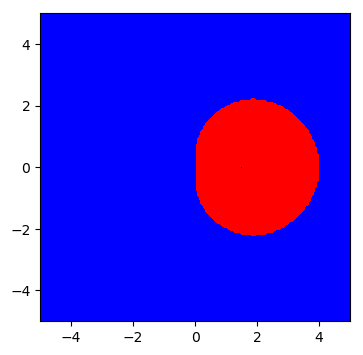

PyObject <matplotlib.contour.QuadContourSet object at 0x00000000021E22E8>

In [28]:
# BDF2

X,Y,Z=RAS([1/3,-4/3,1],[0,0,2/3])
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

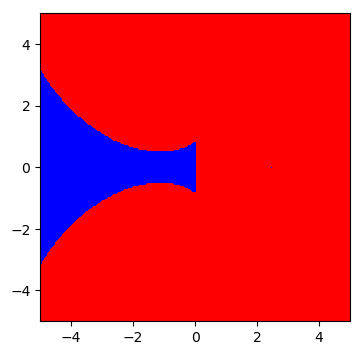

PyObject <matplotlib.contour.QuadContourSet object at 0x00000000022356A0>

In [29]:
# BDF6
# This one chooses a larger plot region

X,Y,Z=RAS([10,-72,225,-400,450,-360,147]/147,[0,0,0,0,0,0,60/147])
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

In [30]:
function RASRK(A,b)
    N=200
    x1d=LinRange(-5.0,5.0,N)
    X,Y=ndgrid(x1d,x1d)
    Z=zeros(size(X))
    M = size(b,1)
    @assert(size(A,1)==size(A,2) & size(A,1)==M)
    e=ones(M)
    for j = 1 : prod(size(X))
        lam = X[j] + im*Y[j]
        R = 1.0+b'*inv(Matrix(I,M,M)-lam*A)*e*lam
        if(abs(R[1])<=1.0)
            Z[j] = 1.0
        else 
            Z[j] = 0.0
        end
    end
    return X,Y,Z    
end 

RASRK (generic function with 1 method)

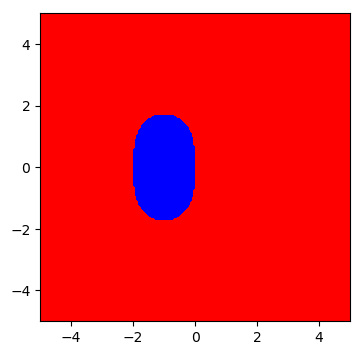

PyObject <matplotlib.contour.QuadContourSet object at 0x0000000002289A58>

In [31]:
# RK2
A = [0 0
    0.5 0]
b = [0.0, 1.0]
X,Y,Z=RASRK(A,b)
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

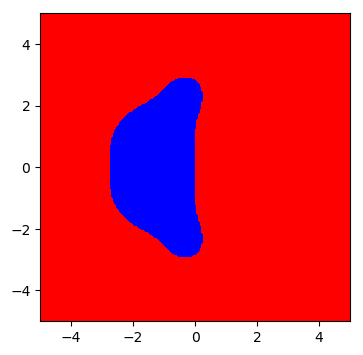

PyObject <matplotlib.contour.QuadContourSet object at 0x00000000022DFDD8>

In [32]:
# RK4
A = [0 0 0 0
0.5 0 0 0 
0 0.5 0 0
0 0 1.0 0]
b = [1.0,2.0,2.0,1.0]/6.0
X,Y,Z=RASRK(A,b)
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

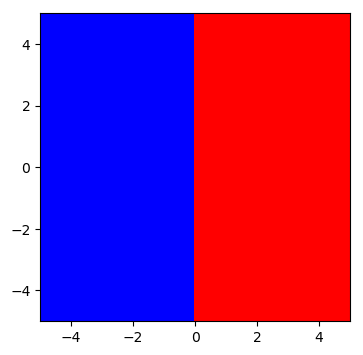

PyObject <matplotlib.contour.QuadContourSet object at 0x000000000233D198>

In [33]:
# Gauss-Legendre 1
A = [0.5]
b = [1.0]
X,Y,Z=RASRK(A,b)
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

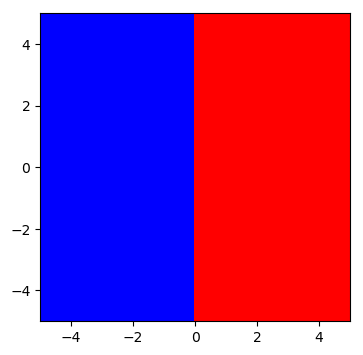

PyObject <matplotlib.contour.QuadContourSet object at 0x000000000238E518>

In [34]:
# Gauss-Legendre 2
A = [1.0/4.0 1.0/4.0 - sqrt(3.0)/6.0
    1.0/4.0+sqrt(3.0)/6.0 1.0/4.0]
b = [0.5, 0.5]
X,Y,Z=RASRK(A,b)
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

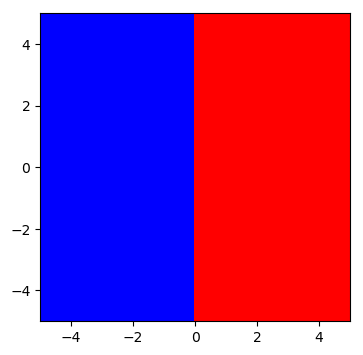

PyObject <matplotlib.contour.QuadContourSet object at 0x00000000023E2898>

In [35]:
# Gauss-Legendre 3
A = [5.0/36.0  2.0/9.0-sqrt(15.0)/15.0  5.0/36.0-sqrt(15.0)/30.0
    5.0/36.0+sqrt(15.0)/24.0   2.0/9.0   5.0/36.0 - sqrt(15.0)/24.0
    5.0/36.0+sqrt(15.0)/30.0   2.0/9.0+sqrt(15.0)/15.0   5.0/36.0]
b = [5.0/18.0, 4.0/9.0, 5.0/18.0]
X,Y,Z=RASRK(A,b)
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))